# Jupyter Notebook

This is a Jupyter Notebook, which is a basically just a super fancy Python shell.

You may have "cells" that can either be text (like this one) or executable Python code. Notebooks are really nice because they allow you to rapidly develop Python code by writing small bits of code, testing their output, and moving on to the next bit; this interactive nature of the notebook is a huge plus to professional Python developers. 

It's also nice, because it's really easy to share your code with others and surround it with text to tell a story! 

# Colaboratory
Colaboratory is a service provided by Google to take a Jupyter Notebook (a standard formay of a `.ipynb` file) and let users edit/run the code in the notebook for free! 

This notebook is write-protected so you are not able to edit the  notebook that the whole class will look at, but you are able to open up the notebook in "playground mode" which lets you make edits to a temporary copy of the notebook. If you want to save the changes you made to this notebook, you will have to follow the instructions when you try to save to copy the notebook to your Google Drive. 

# Setup
Make sure you run the following cell(s) before trying to run any the following cells. You do not need to understand what they are doing, it's just a way to make sure there is a file we want to use stored on the computer running this notebook.


In [0]:
# This takes a little while to run unfortunately
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz 2>/dev/null | tar xz
!apt-get install -qq g++ make
import os
os.chdir('/content/spatialindex-src-1.8.5')
!./configure 2>&1 >/dev/null && make 2>&1 >/dev/null && make install && ldconfig
!pip install -q rtree

In [0]:
import requests
import zipfile


def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

    
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/data.zip', 'data.zip')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/gz_2010_us_040_00_5m.json', 
          'gz_2010_us_040_00_5m.json')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/stormhistory.csv', 'stormhistory.csv')

with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall()
    
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

Requirement already up-to-date: geopandas in /usr/local/lib/python3.6/dist-packages (0.5.0)
Requirement already up-to-date: pyshp in /usr/local/lib/python3.6/dist-packages (2.1.0)
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.6.4.post2)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [0]:
%matplotlib inline
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

# Dissolve
The first two cells are just review from Monday to plot information about the world in the `countries` dataset.

In [0]:
countries = geopandas.read_file('data/ne_110m_admin_0_countries.shp')

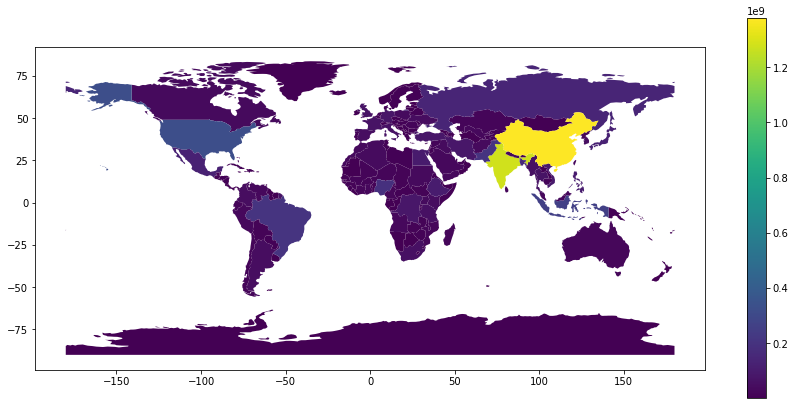

In [0]:
countries.plot(column='POP_EST', figsize=(15, 7), legend=True)

When we first learned `pandas`, we learned about the `groupby` operation. `geopandas` provides a similar function called `dissolve`. It is basically the same as groupby for the non-geometry column, but will combine all the geometries by overlapping them. One annoying thing about `dissolve` is that it operates on all columns, we we first have to make a smaller `GeoDataFrame` that only has the columns we want to group by or aggregate. 

In [0]:
populations = countries[['CONTINENT', 'POP_EST', 'geometry']]

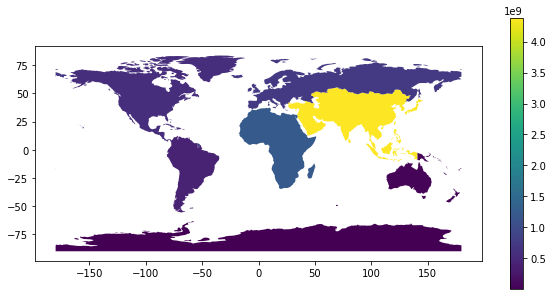

In [0]:
popluation_by_continent = populations.dissolve(by='CONTINENT', aggfunc='sum')
popluation_by_continent.plot(column='POP_EST', legend=True, figsize=(10, 5))

# Spatial Join 
Going back to the hurricane data we saw on Monday, we  wanted to highlight the states that the hurricane went through. The first 3 cells are from Monday for recap. We did not finish this example because we ended lecture early. This example will be finished in section tomorrow! 

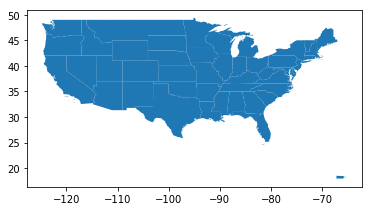

In [0]:
country = geopandas.read_file("gz_2010_us_040_00_5m.json")
mainland = country[(country['NAME'] != 'Alaska') & (country['NAME'] != 'Hawaii')]
mainland.plot()

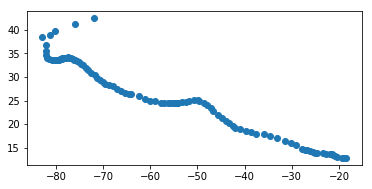

In [0]:
from shapely.geometry import Point

florence = pd.read_csv('stormhistory.csv')
florence['coordinates'] = [Point(long, lat) for long, lat in 
                           zip(-florence['Long'], florence['Lat'])]
florence = geopandas.GeoDataFrame(florence, geometry='coordinates')
florence.plot()

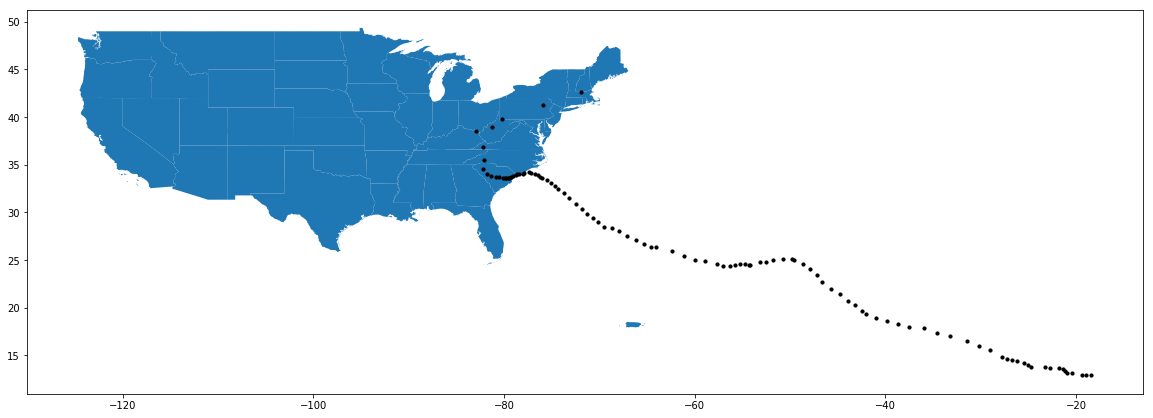

In [0]:
fig, ax = plt.subplots(1, figsize=(20,10))
mainland.plot(ax=ax)
florence.plot(ax=ax, color='#000000', markersize=10)

The first step we will need to solve this problem is plotting the map in layers. We first selected just Washington and then plotted both washington and the mainland US **on the same axis**.  We noticed the order you plot is important.

In [0]:
washington = mainland[mainland['NAME'] == 'Washington']

fig, ax = plt.subplots(1)
mainland.plot(ax=ax, color='#EEEEEE')
washington.plot(ax=ax)

## Start section material

# Section Problems

## Problem 1) `highlight_population`
Write a function named `highlight_population` that takes the countries `GeoDataFrame` and the name of a continent and makes a plot like we did in lecture that colors the population of the countries in the continent. Instead of plotting the raw population numbers, you should plot the percentage of the population of that continent that lives there. To do this, you are allowed to add a new column to the dataset called `pop_ratio`.

The plot should show all countries outside of the content as grey (color being #EEEEEE and edgecolor #FFFFFF). The plot should include a legend. The legend should be scaled so the minimum value is 0 (`vmin=0`) and the maximum value is 1 (`vmax=1`).

In [0]:
# Solution

  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


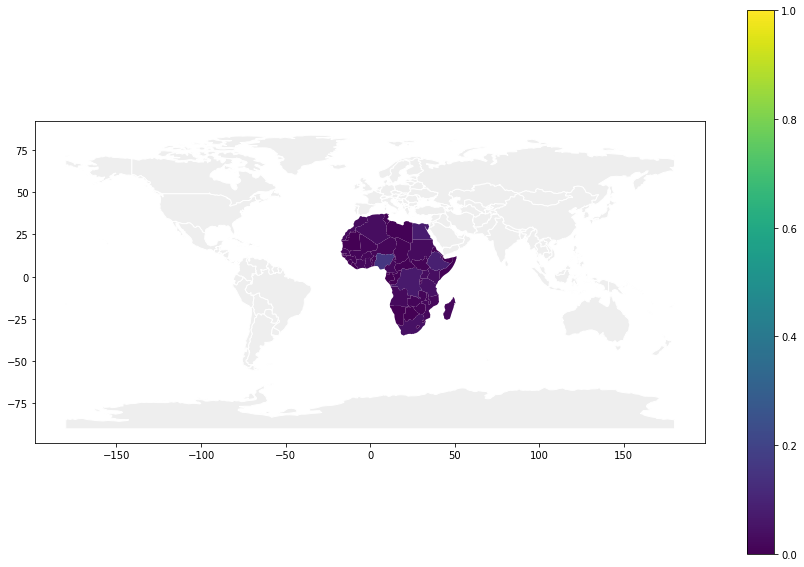

In [0]:
highlight_population(countries, 'Africa')

## Problem 2) gdp_and_population_ratio
Write a function named `gdp_and_population_ratio` that takes the countries `GeoDataFrame` and makes a plot with two subplots. The first subplot should show ratio of the population that lives in each countriy as the color. The second subplot should show the ratio of the world GDP that each country has. To do this, you are allowed to add a new columns to the dataset called `pop_ratio` and `gdp_ratio`.

The plot should include a legend. The legend should be scaled so the minimum value is 0 (`vmin=0`) and the maximum value is 1 (`vmax=1`).

In [0]:
# Solution


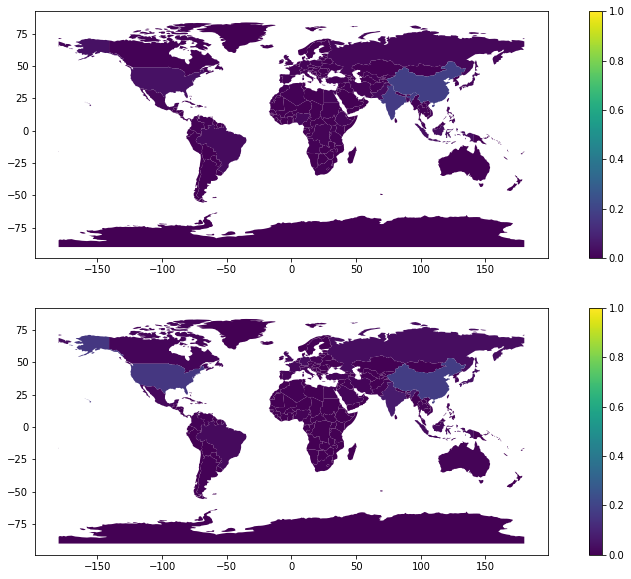

In [0]:
gdp_and_population_ratio(countries)